In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('loan_cleaned.csv')
df.head()

,applicant_id,gender,age,marital_status,dependents,education,employment_status,occupation_type,residential_status,city/town,...,loan_amount_requested,loan_term,loan_purpose,interest_rate,loan_type,co-applicant,bank_account_history,transaction_frequency,default_risk,loan_approval_status
0,1,Female,25,Married,2,Graduate,Employed,Business,Own,Urban,...,24535,209,Home,4.27,Secured,Yes,8,20,0.81,1
1,2,Male,36,Married,2,High School,Employed,Business,Own,Suburban,...,8288,33,Home,14.78,Unsecured,Yes,9,9,0.17,0
2,3,Male,43,Single,0,Postgraduate,Self-Employed,Freelancer,Own,Urban,...,10308,159,Vehicle,12.33,Secured,Yes,7,27,0.25,0
3,4,Female,28,Married,0,High School,Self-Employed,Freelancer,Rent,Suburban,...,33937,39,Personal,8.77,Secured,No,9,16,0.27,1
4,5,Female,32,Single,0,Graduate,Employed,Salaried,Rent,Suburban,...,23360,34,Home,9.04,Unsecured,No,1,17,0.32,1


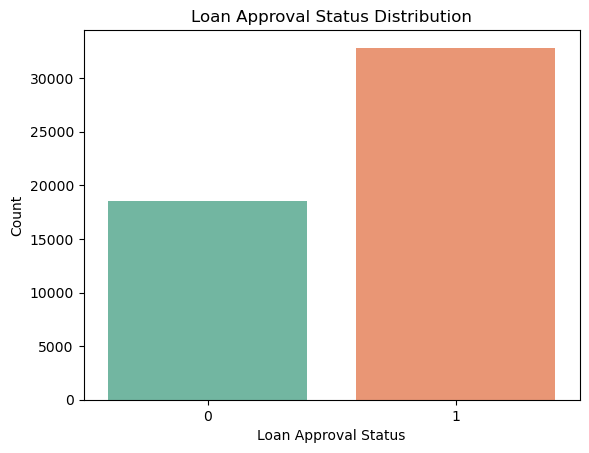

In [3]:
sns.countplot(x='loan_approval_status', data=df, palette='Set2') 
plt.xlabel('Loan Approval Status')
plt.ylabel('Count')
plt.title('Loan Approval Status Distribution')  
plt.show()

In [4]:
#feature Engineering
df['income_to_expenses_ratio'] = df['annual_income'] / df['monthly_expenses'] 
df['debt_to_income_ratio'] = df['outstanding_debt'] / df['annual_income']
df['loan_to_value_ratio'] = df['loan_amount_requested'] / df['total_existing_loan_amount']
df['age_group'] = pd.cut(df['age'], bins=[18, 30, 45, 60, float('inf')], labels=[ 'Young Professionals','Middle aged', 'Late Career', 'Senior'])
df['trans_freq_level'] =  pd.cut(df['transaction_frequency'], bins=[5, 17, 23, float('inf')], labels=[ 'Low','Meduium','High']) 


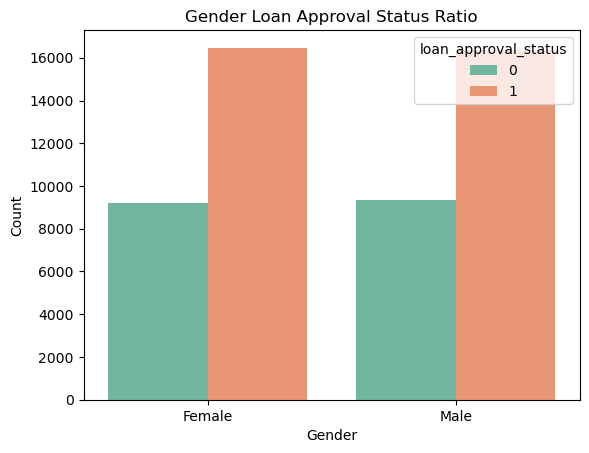

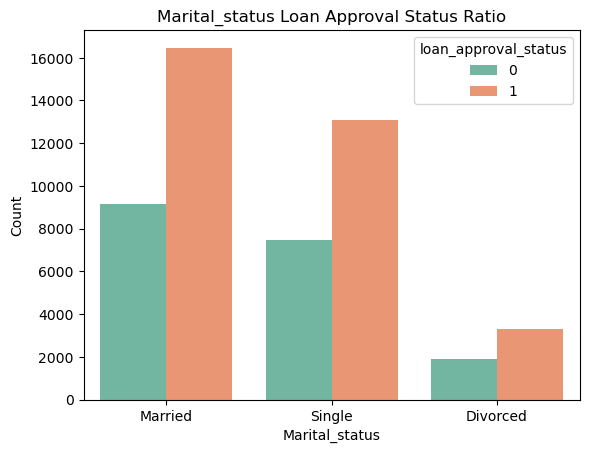

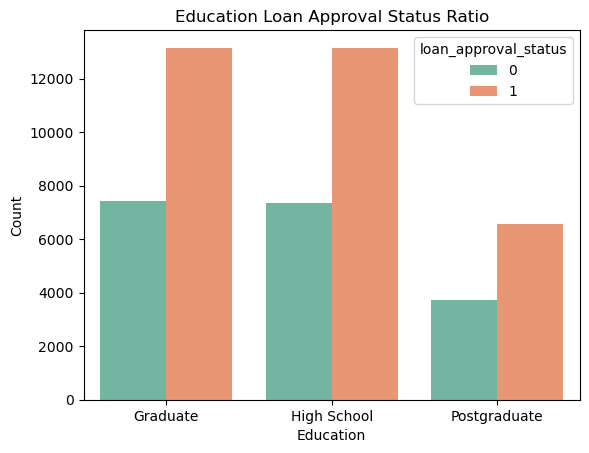

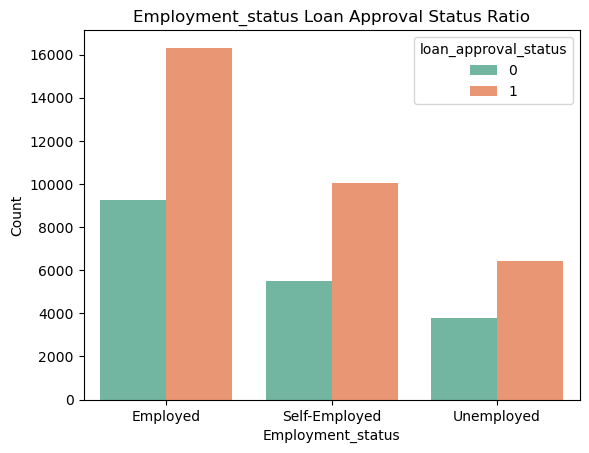

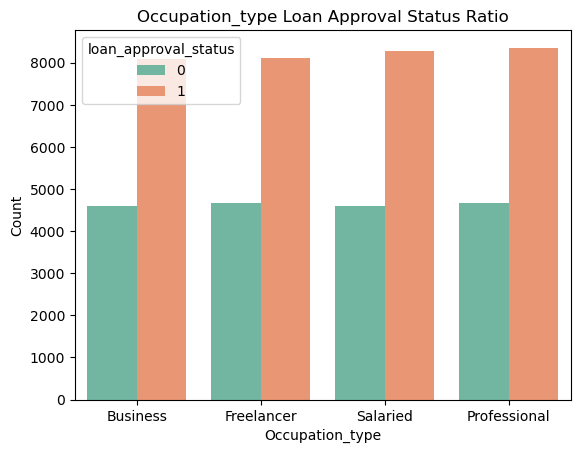

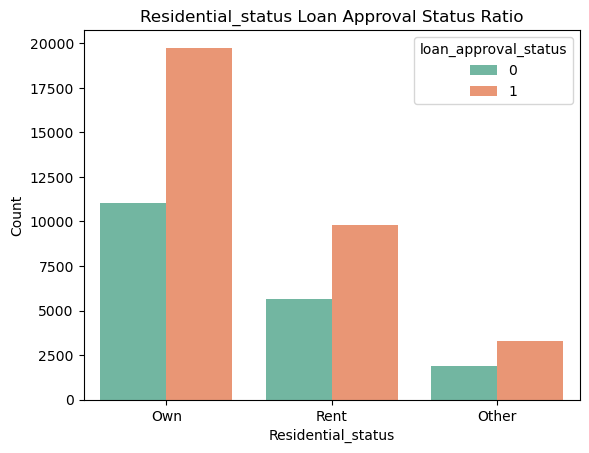

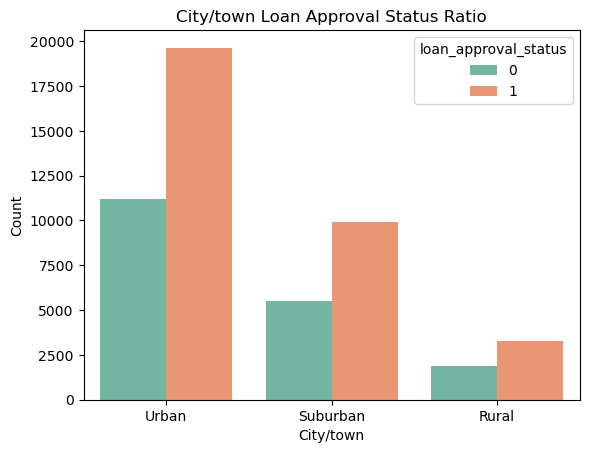

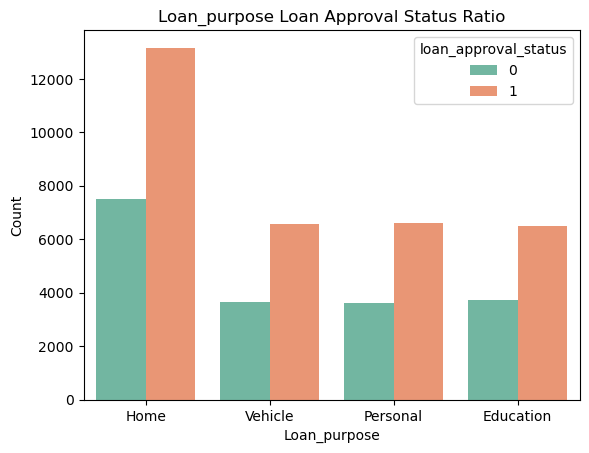

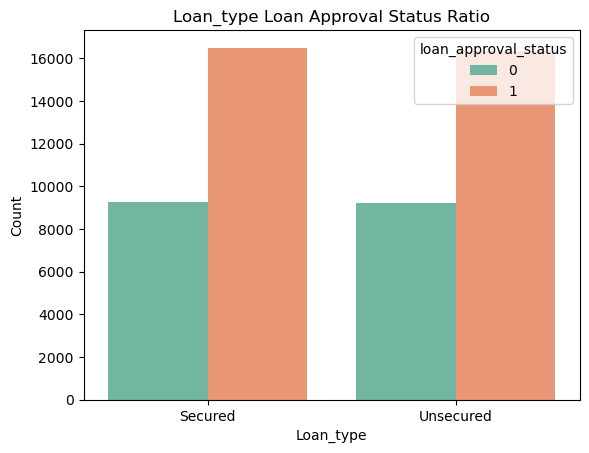

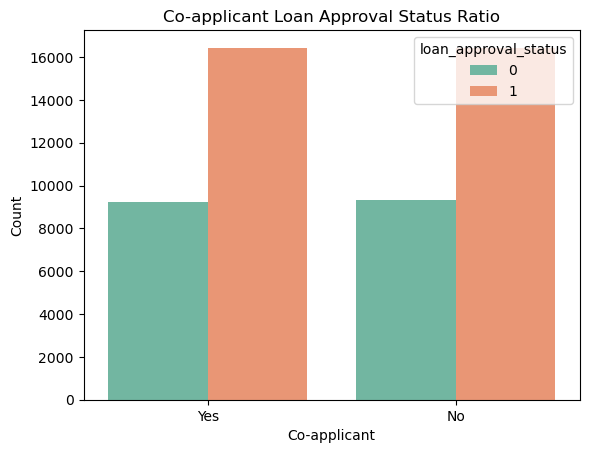

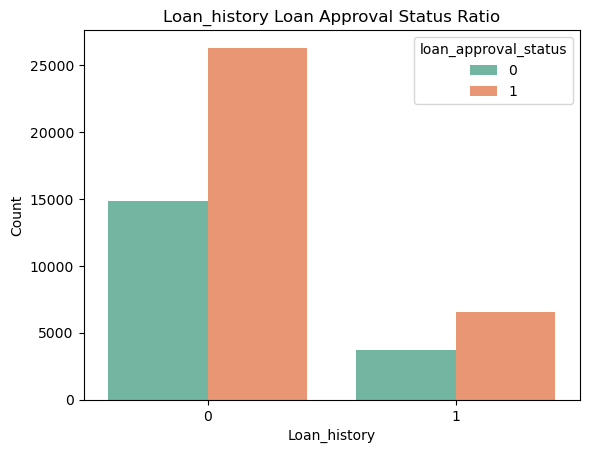

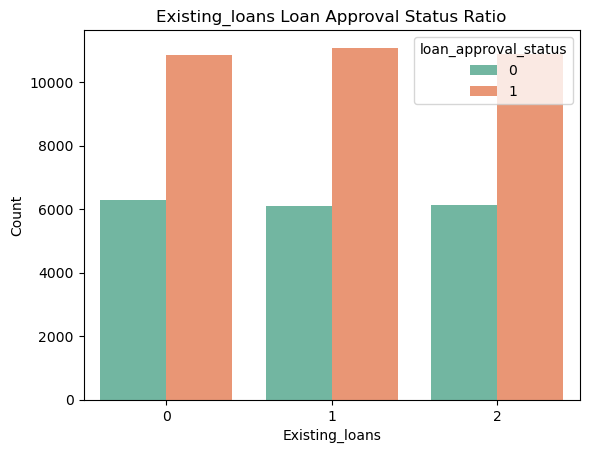

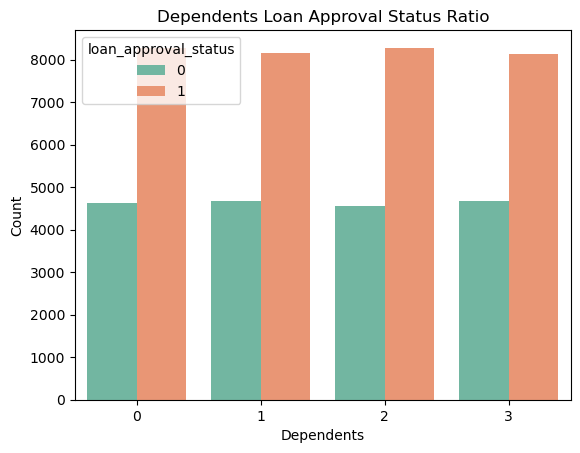

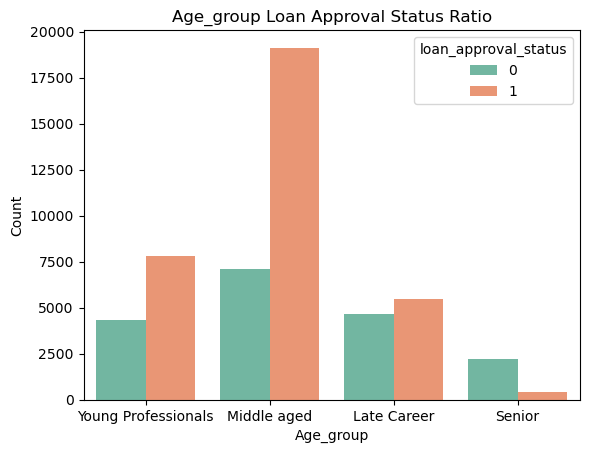

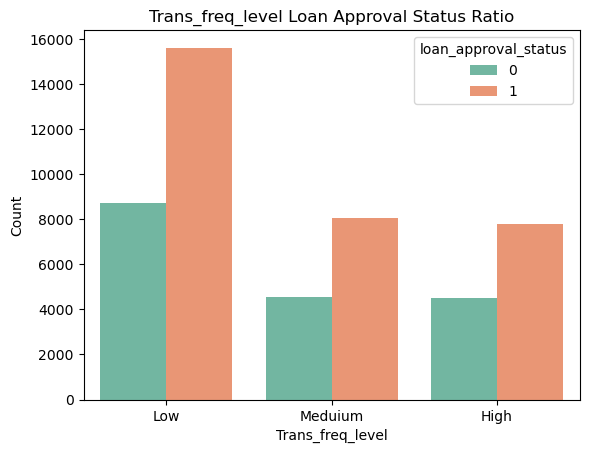

In [5]:
catg_features = df.select_dtypes(include=['object']).columns.tolist() 

catg_features.extend([ 'loan_history', 'existing_loans','dependents','age_group','trans_freq_level'])


for col in catg_features:
    col_title = col.capitalize()
    
    sns.countplot(x=col, data=df, palette='Set2', hue='loan_approval_status')
    
    plt.xlabel(col_title)
    plt.ylabel('Count')
    plt.title(col_title + ' Loan Approval Status Ratio')
    
    plt.show()


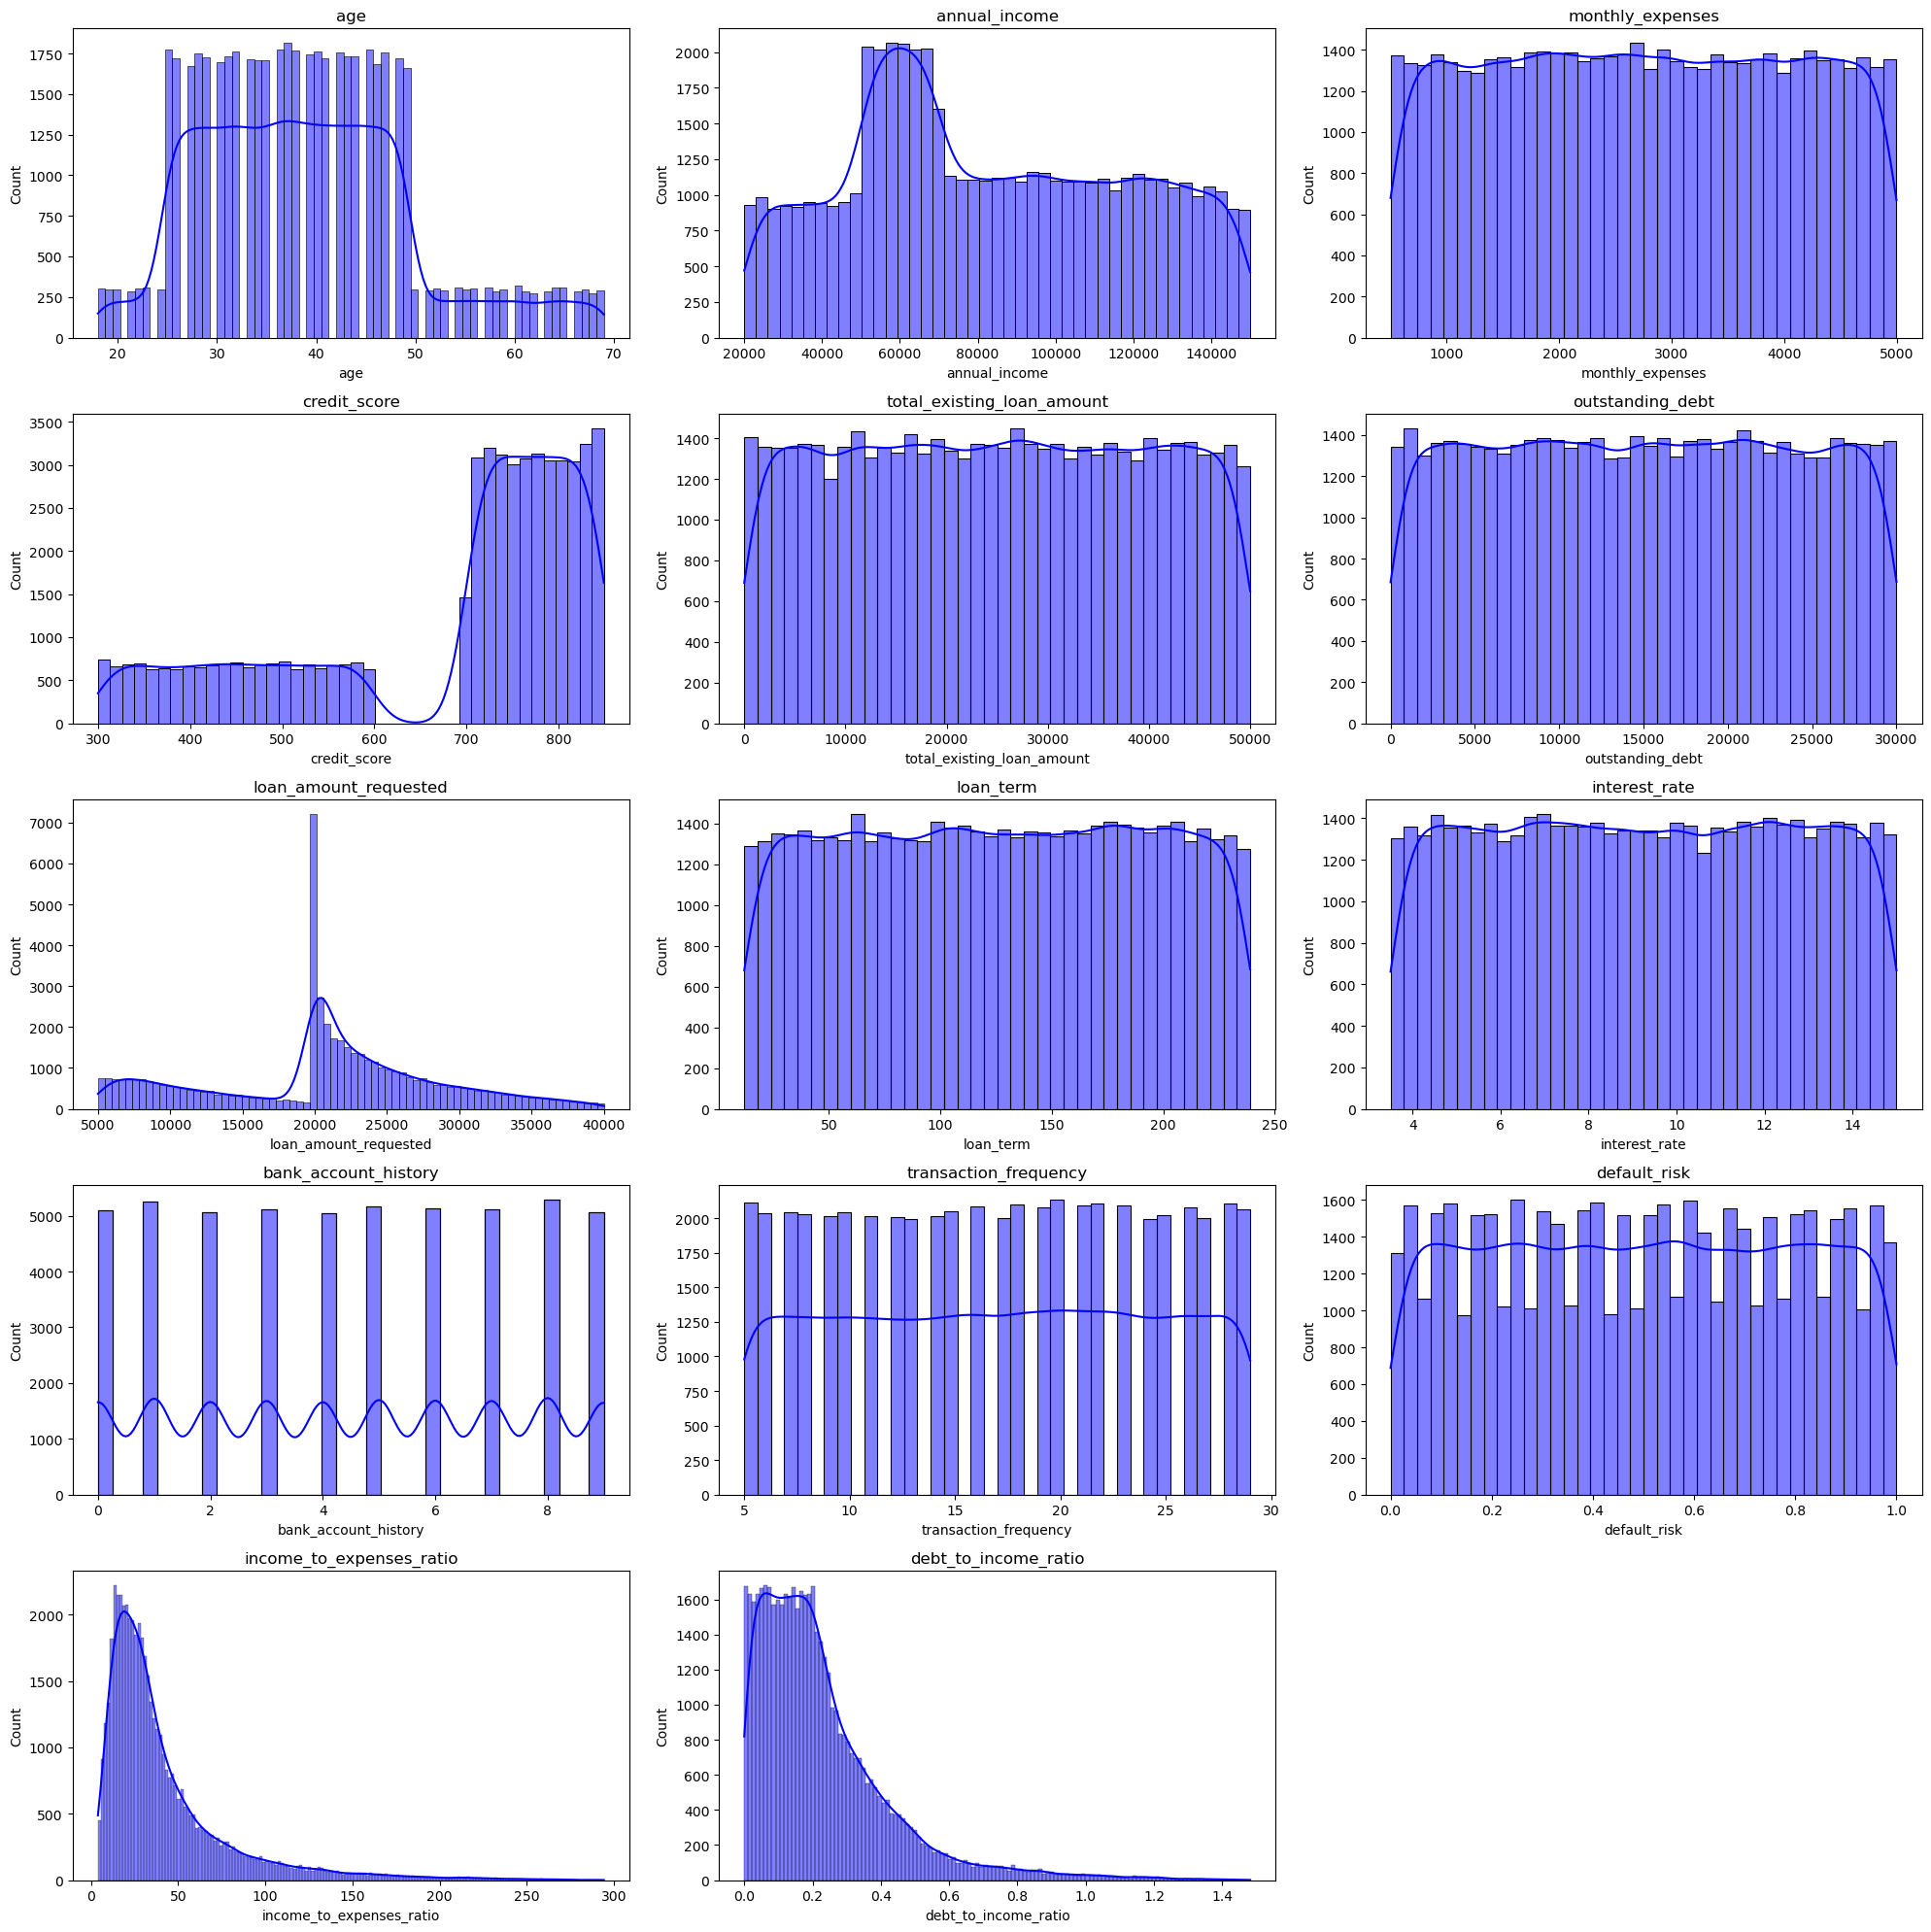

In [6]:
distribution_features = [ 'age',  'annual_income',
                        'monthly_expenses', 'credit_score', 
                        'total_existing_loan_amount', 'outstanding_debt',
                        'loan_amount_requested', 'loan_term', 'interest_rate', 'bank_account_history',
                         'transaction_frequency', 'default_risk','income_to_expenses_ratio','debt_to_income_ratio']
plt.figure(figsize=(20, 20))  

for i, col in enumerate(distribution_features, 1):
    plt.subplot(5, 3, i)  
    sns.histplot(df[col], kde=True, color='blue')  
    plt.title(col)  
    plt.xlabel(col)
    

plt.tight_layout()
plt.show()

In [7]:
categorical_columns = ['gender',
 'marital_status',
 'education',
 'employment_status',
 'occupation_type',
 'residential_status',
 'city/town',
 'loan_purpose',
 'loan_type',
 'co-applicant',
 'loan_history',
 'existing_loans',
 'age_group',
 'trans_freq_level']

def chi_square_test(df, column, target):
    contingency_table = pd.crosstab(df[column], df[target])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"Chi-square test for {column}:")
    print(f"Chi2 Statistic = {chi2}")
    print(f"p-value = {p}")
    if p < 0.05:
        print('*'*50)
        print(f"Reject H0: There is a significant relationship between {column} and {target}.")
        print('*'*50)
    else:
        print(f"Fail to Reject H0: There is no significant relationship between {column} and {target}.")
    print("")


for column in categorical_columns:
    chi_square_test(df, column, 'loan_approval_status')

Chi-square test for gender:
Chi2 Statistic = 1.0491476717845967
p-value = 0.30570346737382226
Fail to Reject H0: There is no significant relationship between gender and loan_approval_status.

Chi-square test for marital_status:
Chi2 Statistic = 2.9022974924772904
p-value = 0.23430098106998254
Fail to Reject H0: There is no significant relationship between marital_status and loan_approval_status.

Chi-square test for education:
Chi2 Statistic = 0.5914547368879959
p-value = 0.7439902355886309
Fail to Reject H0: There is no significant relationship between education and loan_approval_status.

Chi-square test for employment_status:
Chi2 Statistic = 8.683363160307444
p-value = 0.013014624657782638
**************************************************
Reject H0: There is a significant relationship between employment_status and loan_approval_status.
**************************************************

Chi-square test for occupation_type:
Chi2 Statistic = 2.6983554673370858
p-value = 0.44050683780

In [9]:
df.groupby(['employment_status','age_group'])['loan_approval_status'].mean()

employment_status  age_group          
Employed           Young Professionals    0.646179
                   Middle aged            0.730050
                   Late Career            0.535552
                   Senior                 0.152607
Self-Employed      Young Professionals    0.645646
                   Middle aged            0.734820
                   Late Career            0.549580
                   Senior                 0.162760
Unemployed         Young Professionals    0.629992
                   Middle aged            0.720623
                   Late Career            0.535818
                   Senior                 0.141777
Name: loan_approval_status, dtype: float64

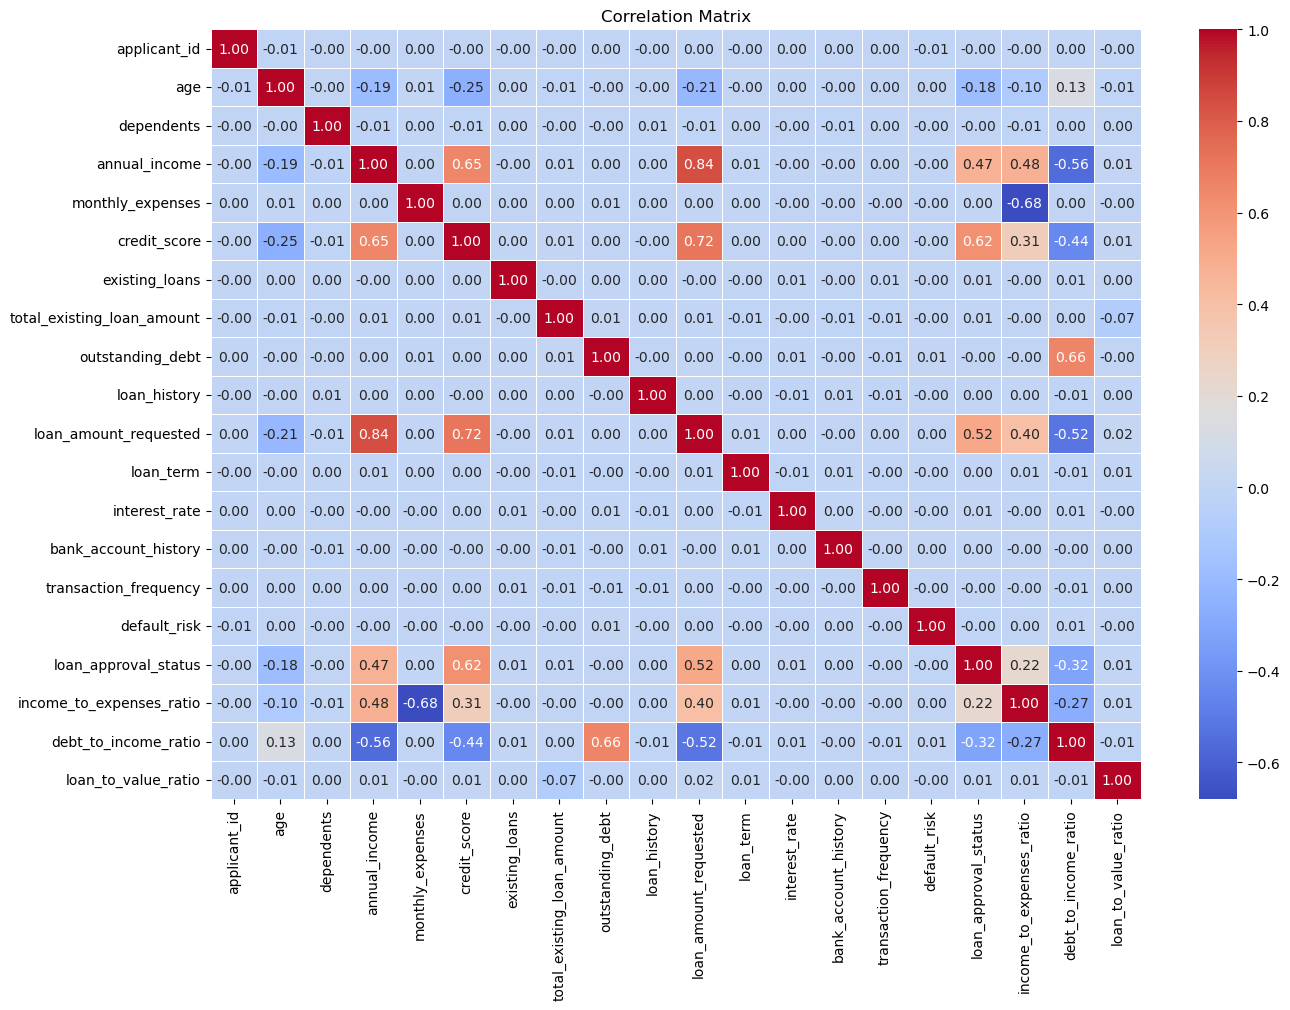

In [8]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(15, 10))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix')
plt.show()

In [ ]:
annual_income ~ credit_score =0.65
annual_income ~ loan_amount_request = 0.84
annual_income ~ loan_approve_status = 0.47
annual_income ~ income_to_expenses_ratio = 0.48
annual_income ~ debt_to_income_ratio = -0.56
monthly_expenses ~ income_to_expenses_ratio = -0.68
credit_score ~ loan_amount_request = 0.72
credit_score ~ loan_approval_status = 0.62
credit_score ~ income_to_expenses_ratio = 0.31
credit_score ~ debt_to_income_ratio = -0.44
loan_amount_request ~ loan_approval_status = 0.52
loan_amount_request ~ income_to_expenses_ratio = 0.40
loan_amount_request ~ debt_to_income_ratio = -0.52
loan_approve_status ~ debt_to_income_ratio = -0.32

In [12]:
# ฟีเจอร์ที่เกี่ยวข้องกับ loan approval status และค่าความสัมพันธ์ที่ได้จากการวิเคราะห์
selected_features = ['age_group','employment_status','credit_score', 'loan_amount_requested', 'annual_income', 
                     'debt_to_income_ratio', 'income_to_expenses_ratio', 'monthly_expenses']



# ตรวจสอบว่า DataFrame มีฟีเจอร์เหล่านี้หรือไม่
df_selected = df[selected_features]
df_selected.head()

,age_group,employment_status,credit_score,loan_amount_requested,annual_income,debt_to_income_ratio,income_to_expenses_ratio,monthly_expenses
0,Young Professionals,Employed,743,24535,139901,0.141686,55.231346,2533
1,Middle aged,Employed,468,8288,21162,0.865750,5.236823,4041
2,Middle aged,Self-Employed,389,10308,27815,0.497969,8.055314,3453
3,Young Professionals,Self-Employed,778,33937,137853,0.207525,50.458638,2732
4,Middle aged,Employed,752,23360,81753,0.107397,49.607403,1648


In [13]:
df_selected.to_csv('loan_analyzed.csv', index=False)